In [25]:
import pandas as pd
xls = 'data.xlsx'
df1 = pd.read_excel(xls, 'Gene1')
df2 = pd.read_excel(xls, 'Gene2')
df3 = pd.read_excel(xls, 'Gene3')
df4 = pd.read_excel(xls, 'Gene4')
df5 = pd.read_excel(xls, 'Gene5')

df1


,Condition 1,Condition 2
0,46.4349,69.5831
1,34.2250,98.2349
2,33.9168,60.8317
3,42.0858,56.6614
4,29.4565,84.4880
5,37.5167,44.1518
6,43.2388,49.1646
7,40.5459,76.3167
8,33.9497,88.4553
9,29.2911,75.2409


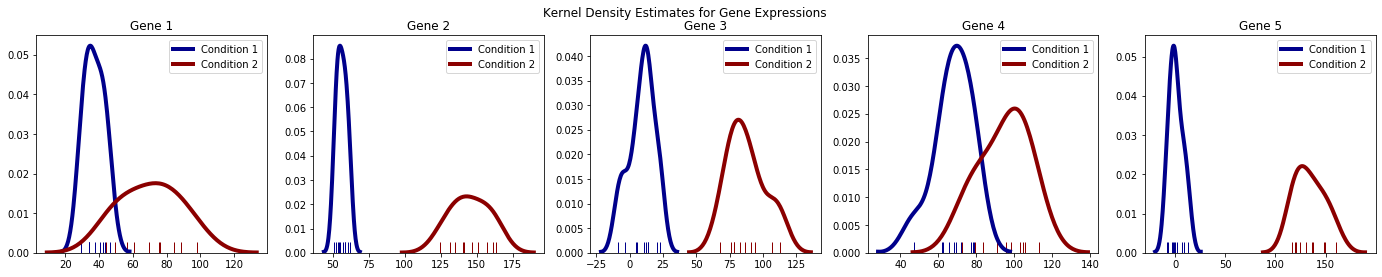

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 5, sharex=False, figsize=(24, 4))
fig.suptitle('Kernel Density Estimates for Gene Expressions')

i = 0
for df in [df1, df2, df3, df4, df5]:
    axes[i].set_title(f'Gene {i+1}')
    sns.distplot(ax=axes[i], a = df['Condition 1'], hist=False, kde_kws={'linewidth':4}, color='darkblue', label = 'Condition 1', axlabel=False, rug=True)
    sns.distplot(ax=axes[i], a = df['Condition 2'], hist=False, kde_kws={'linewidth':4}, color='darkred', label='Condition 2', axlabel=False, rug=True)
    i += 1


In [27]:
from scipy.stats import anderson
i = 1
for df in [df1, df2, df3, df4, df5]:
    stat, cv, siglevels = anderson(df['Condition 1'])
    if stat < cv[2]:
        print('For alpha = {}, the samples from Gene {} Condition 1 is normal'.format(siglevels[2]/100, i))
    else: 
        print('For alpha = {}, the samples from Gene {} Condition 1 is NOT normal'.format(siglevels[2]/100, i))

    stat, cv, siglevels = anderson(df['Condition 2'])
    if stat < cv[2]:
        print('For alpha = {}, the samples from Gene {} Condition 2 is normal'.format(siglevels[2]/100, i))
    else: 
        print('For alpha = {}, the samples from Gene {} Condition 2 is NOT normal'.format(siglevels[2]/100, i))
    print('\n')
    i += 1

For alpha = 0.05, the samples from Gene 1 Condition 1 is normal
For alpha = 0.05, the samples from Gene 1 Condition 2 is normal


For alpha = 0.05, the samples from Gene 2 Condition 1 is normal
For alpha = 0.05, the samples from Gene 2 Condition 2 is normal


For alpha = 0.05, the samples from Gene 3 Condition 1 is normal
For alpha = 0.05, the samples from Gene 3 Condition 2 is normal


For alpha = 0.05, the samples from Gene 4 Condition 1 is normal
For alpha = 0.05, the samples from Gene 4 Condition 2 is normal


For alpha = 0.05, the samples from Gene 5 Condition 1 is normal
For alpha = 0.05, the samples from Gene 5 Condition 2 is normal




In [28]:
import scipy
import numpy as np

f_test_alpha = 0.01

def f_test(dataframe):
    f = np.var(dataframe['Condition 1'], ddof=1)/np.var(dataframe['Condition 2'], ddof=1)
    if f >= 1:
        pass
    else:
        f = 1/f
    dof1 = len(dataframe['Condition 1']) - 1 
    dof2 = len(dataframe['Condition 2']) - 1 
    p = 1 - scipy.stats.f.cdf(f, dof1, dof2) 
    return f, p

i = 1
for df in [df1, df2, df3, df4, df5]:
    f, p = f_test(df)
    print(f'Gene {i} --------------------------')
    print('Variance of Condition 1 = {} | Variance of Condition 2 = {}'.format(np.var(df['Condition 1']), np.var(df['Condition 2'])))
    print(f'F-value = {f} | p-value = {p}')

    if p <= f_test_alpha:
        print('Variances are different. Use Welch\'s test \n')
    else: 
        print('Variances are similar. Use two-sample T test \n')
    i += 1
    

Gene 1 --------------------------
Variance of Condition 1 = 30.9444601036 | Variance of Condition 2 = 277.84919800039995
F-value = 8.97896415287839 | p-value = 0.001568998276773037
Variances are different. Use Welch's test 

Gene 2 --------------------------
Variance of Condition 1 = 11.8901344025 | Variance of Condition 2 = 154.83023629000007
F-value = 13.021739792734868 | p-value = 0.00037091437626080026
Variances are different. Use Welch's test 

Gene 3 --------------------------
Variance of Condition 1 = 86.289526198485 | Variance of Condition 2 = 181.3910108949
F-value = 2.102120835356779 | p-value = 0.14181274044932368
Variances are similar. Use two-sample T test 

Gene 4 --------------------------
Variance of Condition 1 = 82.308460646 | Variance of Condition 2 = 150.53190254409998
F-value = 1.828875201439155 | p-value = 0.19094205248373952
Variances are similar. Use two-sample T test 

Gene 5 --------------------------
Variance of Condition 1 = 41.675838224448086 | Variance of 

In [29]:
b_test_alpha = 0.05
i = 1
not_eq, eq = [], []
for df in [df1, df2, df3, df4, df5]:
    stat, p = scipy.stats.bartlett(df['Condition 1'], df['Condition 2'])
    if p < b_test_alpha:
        not_eq.append(i)
    else:
        eq.append(i)
    i += 1
print('Similar Variance : Gene(s),', eq)
print('Different Variance : Gene(s),', not_eq)

Similar Variance : Gene(s), [3, 4]
Different Variance : Gene(s), [1, 2, 5]


In [30]:
from scipy.stats import t
def independent_ttest(dataframe, type):
    mean1, mean2 = np.mean(dataframe['Condition 1']), np.mean(dataframe['Condition 2'])
    std1, std2 = np.std(dataframe['Condition 1'], ddof=1), np.std(dataframe['Condition 2'], ddof=1)
    n1, n2 = len(dataframe['Condition 1']), len(dataframe['Condition 2'])
    se1, se2 = std1/np.sqrt(n1), std2/np.sqrt(n2)
    sed = np.sqrt(se1**2.0 + se2**2.0)
    if type == 'welch':
        deg = ((std1**2/n1 + std2**2/n2)**2)/((std1**2/n1)**2/(n1-1) + (std2**2/n2)**2/(n2-1))
    elif type == 'standard':
        deg = n1 + n2 - 2
    t_stat = (mean1 - mean2) / sed
    p = (1 - t.cdf(abs(t_stat), deg)) * 2

    return [t_stat, p]

In [31]:
result_arr = []
for df in [df1, df2, df3, df4, df5]:
    _, p = f_test(df)
    if p < f_test_alpha:
        result_arr.append(independent_ttest(df, 'welch'))
    else:
        result_arr.append(independent_ttest(df, 'standard'))
result = pd.DataFrame(result_arr, index = [f'Gene {i}' for i in range(1, 6)], columns = ['t-statistics', 'p-values'])
result

,t-statistics,p-values
Gene 1,-5.675915,1.441863e-04
Gene 2,-20.683337,9.020664e-10
Gene 3,-14.371233,2.633227e-11
Gene 4,-5.222049,5.755922e-05
Gene 5,-26.086884,8.881784e-16


In [32]:
from scipy.stats import t, ttest_ind
for df in [df1, df2, df3, df4, df5]:
    _, p = f_test(df)
    if p < f_test_alpha:
        print(ttest_ind(df['Condition 1'], df['Condition 2'], equal_var=False)) # Welch's t test
    else: 
        print(ttest_ind(df['Condition 1'], df['Condition 2'], equal_var=True)) # Standard t test

Ttest_indResult(statistic=-5.675914886939958, pvalue=0.000144186331357598)
Ttest_indResult(statistic=-20.68333705550787, pvalue=9.020664554800772e-10)
Ttest_indResult(statistic=-14.37123332793971, pvalue=2.6332269229559867e-11)
Ttest_indResult(statistic=-5.222049175840459, pvalue=5.7559222583281676e-05)
Ttest_indResult(statistic=-26.08688358882898, pvalue=9.40120399823576e-16)


In [33]:
alpha = 0.01
sig_level = alpha / 5 # Bonferroni corrected value
sorted_result = result.sort_values('p-values').loc[result['p-values'] < sig_level]
print('\n Number of differential genes:', len(sorted_result))
sorted_result


 Number of differential genes: 5


,t-statistics,p-values
Gene 5,-26.086884,8.881784e-16
Gene 3,-14.371233,2.633227e-11
Gene 2,-20.683337,9.020664e-10
Gene 4,-5.222049,5.755922e-05
Gene 1,-5.675915,1.441863e-04


In [24]:
print("Highest p-value that can pass through Bonferroni :", sorted_result['p-values'].max())

Highest p-value that can pass through Bonferroni : 0.00014418633135759862
